## 作業

In [1]:
import requests
res = requests.get('https://news.ltn.com.tw/list/breakingnews')
res

<Response [200]>

In [3]:
#res.text

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [6]:
#soup

In [16]:
for li in soup.select('.list li'):
  #print(li)
  title = li.select_one('span.title').text
  dt = li.select_one('.time').text
  link = li.select_one('a.tit').get('href')
  print(title, dt, link)
  print('======================================')

剪接影片造假談話 CNN：拜登用假廣告攻擊川普 09:34 https://news.ltn.com.tw/news/world/breakingnews/3296734
9/19重要財經新聞一覽 09:32 https://ec.ltn.com.tw/article/breakingnews/3296759
米奇米妮萌助陣！這檔購物節超划算 3000現抵300特惠組最低46折 09:30 https://ent.ltn.com.tw/news/breakingnews/3296637
安倍參拜靖國神社 報告已卸下首相職務 09:29 https://news.ltn.com.tw/news/world/breakingnews/3296750
追思李登輝》蔡總統親頒褒揚令 追思文感念「把民主自由留給台灣」 09:28 https://news.ltn.com.tw/news/politics/breakingnews/3296678
追思李登輝》「三十九與九十八」 李坤儀撰文悼念祖父慈愛 09:27 https://news.ltn.com.tw/news/politics/breakingnews/3296736
NBA》詹皇僅拿16張第1名選票  湖人主帥仍力挺：他才是MVP 09:21 https://sports.ltn.com.tw/news/breakingnews/3296723
NBA》重提往事倡導精神健康 「愛神」自曝：好友救了我一命 09:20 https://sports.ltn.com.tw/news/breakingnews/3296707
意外捲入輕生事件 郭雪芙到處傻問「誰墜樓過」 09:20 https://ent.ltn.com.tw/news/breakingnews/3296654
MLB》洋基「園丁」發願再戰2021 美球迷無情狠酸：拜託不要 09:17 https://sports.ltn.com.tw/news/breakingnews/3296695
科技股下挫牽動美各大指數收黑 道瓊跌244點 09:16 https://ec.ltn.com.tw/article/breakingnews/3296681
追思李登輝》兩組民眾疑追思會場周邊抗議 警方帶至陳抗區 09:15 https://news.ltn.com.t

In [17]:
newsary = []
for li in soup.select('.list li'):
  title = li.select_one('span.title').text
  dt = li.select_one('.time').text
  link = li.select_one('a.tit').get('href')
  newsary.append({'title':title, 'dt':dt, 'link':link})
  

In [18]:
newsary[0]

{'dt': '09:34',
 'link': 'https://news.ltn.com.tw/news/world/breakingnews/3296734',
 'title': '剪接影片造假談話 CNN：拜登用假廣告攻擊川普'}

In [19]:
import pandas
newsdf = pandas.DataFrame(newsary)

In [21]:
newsdf.head()

,title,dt,link
0,剪接影片造假談話 CNN：拜登用假廣告攻擊川普,09:34,https://news.ltn.com.tw/news/world/breakingnew...
1,9/19重要財經新聞一覽,09:32,https://ec.ltn.com.tw/article/breakingnews/329...
2,米奇米妮萌助陣！這檔購物節超划算 3000現抵300特惠組最低46折,09:30,https://ent.ltn.com.tw/news/breakingnews/3296637
3,安倍參拜靖國神社 報告已卸下首相職務,09:29,https://news.ltn.com.tw/news/world/breakingnew...
4,追思李登輝》蔡總統親頒褒揚令 追思文感念「把民主自由留給台灣」,09:28,https://news.ltn.com.tw/news/politics/breaking...


In [22]:
newsdf.to_excel('ltnnews.xlsx')

## 完整自由時報爬蟲

In [25]:
import requests
res = requests.get('https://news.ltn.com.tw/ajax/breakingnews/all/2')
jd = res.json()

In [28]:
newsdf = pandas.DataFrame(jd['data'].values())

In [30]:
newsdf.head(3)

,no,title,bigphoto_flag,photo_S,photo_L,url,time,type_en,group,type_cn,local,summary,video,localUrl,tagUrl,style,tagText
0,3296731,追思李登輝》李坤儀手捧骨灰罈 移靈車隊由翠山莊出發,0,http://img.ltn.com.tw/Upload/news/250/2020/09/...,http://img.ltn.com.tw/Upload/news/600/2020/09/...,https://news.ltn.com.tw/news/politics/breaking...,09:13,politics,breakingnews,政治,臺北市,前總統李登輝追思告別禮拜今天在淡水真理大學大禮拜堂舉行，移靈車隊上午約8時45分從翠山莊出發...,0,list/breakingnews/Taipei,list/breakingnews/politics,None,政治
1,3296724,營區停車場猥褻女同袍：「妹妹，你可以幫我嗎？」,0,http://img.ltn.com.tw/Upload/news/250/2020/09/...,http://img.ltn.com.tw/Upload/news/600/2020/09/...,https://news.ltn.com.tw/news/society/breakingn...,09:10,society,breakingnews,社會,高雄市,高市江姓職業軍人藉故約女同袍小真（化名）到營區停車場，在自小客車內涉嫌強行親吻、揉胸，甚至抓...,0,list/breakingnews/Kaohsiung,list/breakingnews/society,None,社會
2,3296649,「雙野CP」默契十足 綾野剛狂嗑烏龍麵直到極限,0,http://img.ltn.com.tw/Upload/ent/page/400S/202...,http://img.ltn.com.tw/Upload/ent/page/800S/202...,https://ent.ltn.com.tw/news/breakingnews/3296649,09:10,entertainment,breakingnews,娛樂,False,星野源、綾野剛主演TBS台日劇《MIU404》日前播畢，全劇收視率創下每集均超過雙位數的亮眼...,0,,list/breakingnews/entertainment,None,娛樂


In [33]:
import requests
import time
newsdfs = []
for i in range(2,11):
  res = requests.get('https://news.ltn.com.tw/ajax/breakingnews/all/{}'.format(i))
  jd = res.json()
  newsdf = pandas.DataFrame(jd['data'].values())
  time.sleep(1)
  newsdfs.append(newsdf)

In [35]:
type(newsdfs)

list

In [37]:
type(newsdfs[0])

pandas.core.frame.DataFrame

In [39]:
res = pandas.concat(newsdfs)

In [43]:
import jieba
words = []
for title in res['title'].tolist():
  words = words + jieba.lcut(title)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.915 seconds.
Prefix dict has been built successfully.


In [46]:
from collections import Counter
words = [word for word in words if len(word) >=2]
c = Counter(words)
c.most_common(10)

[('中職', 12),
 ('追思', 7),
 ('12', 7),
 ('中國', 7),
 ('李登輝', 6),
 ('影音', 6),
 ('兄弟', 6),
 ('網球', 5),
 ('NBA', 5),
 ('回應', 5)]

## Concat v.s. DataFrame

In [48]:
# list of dictionaries
ary = [
 {'title':'abc', 'link':'http://abc.com'},
 {'title':'def', 'link':'http://def.com'}
]

import pandas
df = pandas.DataFrame(ary)
df

,title,link
0,abc,http://abc.com
1,def,http://def.com


In [51]:
ary1 = [
 {'title':'abc', 'link':'http://abc.com'},
 {'title':'def', 'link':'http://def.com'}
]

ary2 = [
 {'title':'abc1', 'link':'http://abc1.com'},
 {'title':'def1', 'link':'http://def1.com'}
]

In [52]:
df1 = pandas.DataFrame(ary1)
df1

,title,link
0,abc,http://abc.com
1,def,http://def.com


In [55]:

df2 = pandas.DataFrame(ary2)
df2

,title,link
0,abc1,http://abc1.com
1,def1,http://def1.com


In [56]:
# list of dataframes
pandas.concat([df1, df2])

,title,link
0,abc,http://abc.com
1,def,http://def.com
0,abc1,http://abc1.com
1,def1,http://def1.com


## Lists

In [57]:
a = [1,2,3,'hello', [4,5,6]]

In [58]:
a.append({'a':1})

In [59]:
a

[1, 2, 3, 'hello', [4, 5, 6], {'a': 1}]

In [60]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

In [62]:
for i in range(len(a)):
  #print(i)
  print(a[i] * b[i])

2
12
30
56
90


In [65]:
for i,j in zip(a,b):
  print(i*j)

2
12
30
56
90


In [66]:
a * b

TypeError: ignored

In [67]:
type(a)

list

In [68]:
import numpy as np
na = np.array(a)

In [69]:
type(na)

numpy.ndarray

In [71]:
a

[1, 3, 5, 7, 9]

In [70]:
na

array([1, 3, 5, 7, 9])

In [72]:
na = np.array(a)
nb = np.array(b)
na * nb

array([ 2, 12, 30, 56, 90])

In [75]:
import numpy as np
my_list = [1,2,3]
na_list = np.array(my_list)

In [77]:
na_list * 3

array([3, 6, 9])

In [78]:
np.sqrt(na_list)

array([1.        , 1.41421356, 1.73205081])

In [80]:
my_matrix =[[1,2,3],[4,5,6],[7,8,9]]
m = np.array(my_matrix)

In [81]:
-1 * m 

array([[-1, -2, -3],
       [-4, -5, -6],
       [-7, -8, -9]])

In [82]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [83]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

In [84]:
np.zeros(3)

array([0., 0., 0.])

In [85]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [86]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [87]:
np.random.randint(1,42,6)

array([26,  8, 20, 29,  4, 30])

In [88]:
arr = np.arange(25)

In [89]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [90]:
arr.shape

(25,)

In [91]:
arr.reshape(5,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [93]:
a = np.array([70,60,43,66,82,90,53,95,88])
a.max()

95

In [94]:
a.min()

43

In [95]:
a.argmax()

7

In [96]:
a.argmin()

2

In [100]:
x = np.array([20,30,10,50,40])
w = np.random.randn(5,7)
o1 = np.dot(x,w)
w1 = np.random.randn(7,4)
o2 = np.dot(o1,w1)

In [101]:
o2

array([  97.25084349,   47.7397188 , -100.92377224,  -41.63147988])

In [102]:
arr = np.arange(0,11)

In [104]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [105]:
arr[8]

8

In [106]:
arr[1:5]

array([1, 2, 3, 4])

In [107]:
arr = np.arange(0,11)

In [108]:
slice_of_arr = arr[0:6]

In [109]:
slice_of_arr

array([0, 1, 2, 3, 4, 5])

In [110]:
slice_of_arr[:]=99

In [111]:
arr

array([99, 99, 99, 99, 99, 99,  6,  7,  8,  9, 10])

In [112]:
arr_2d = np.array(([5,10,15],[20,25,30],[35,40,45]))

In [113]:
arr_2d

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

In [115]:
arr_2d[1]

array([20, 25, 30])

In [116]:
arr_2d[1][0]

20

In [117]:
arr_2d[1,0]

20

In [118]:
arr_2d[2]

array([35, 40, 45])

In [119]:
#[列,欄]
arr_2d[2,:]

array([35, 40, 45])

In [121]:
arr = np.arange(1,11)

In [122]:
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [124]:
arr > 4

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [125]:
bool_ary = arr > 4

In [127]:
arr[bool_ary]

array([ 5,  6,  7,  8,  9, 10])

In [128]:
arr = np.arange(0,10)

In [129]:
arr + arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [130]:
arr - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [131]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [132]:
arr / arr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
# nan => not a number, (missing value)

In [135]:
# inf => infiinity
1/arr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111])

In [134]:
arr ** 3

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [136]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [137]:
np.exp(arr)


array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [138]:
np.max(arr)


9

In [139]:
np.sin(arr)


array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [140]:
np.log(arr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

### Practice
今天有三個學生, David, John, Mary, 她們考的兩次考試成績, 分別為 David: 90, 80,
John: 77, 65, Mary:88,95
請將這三人的考試成績表示成 2維的numpy array
(列:人, 欄: 考試次數)

今天老師給的加權分數為第一次考試為40%, 第二次考試為60%, 請利用該加權分數, 計算他們三人的最後總分?


In [141]:
import numpy as np
student_score = np.array([
  [90,  80],
  [77,  65],
  [88,  95]
])

In [142]:
student_score

array([[90, 80],
       [77, 65],
       [88, 95]])

In [143]:
student_score.shape

(3, 2)

In [146]:
student_score[:,0] * 0.4 + student_score[:,1] * 0.6

array([84. , 69.8, 92.2])

In [147]:
w =np.array([[0.4],[0.6]])
w


array([[0.4],
       [0.6]])

In [148]:
np.dot(student_score, w)

array([[84. ],
       [69.8],
       [92.2]])

In [150]:
import numpy as np
student_score = np.array([
  ['David'  ,90,  80],
  ['John'  ,77,  65],
  ['Marry'  ,88,  95]
])

In [151]:
student_score

array([['David', '90', '80'],
       ['John', '77', '65'],
       ['Marry', '88', '95']], dtype='<U5')

In [154]:
import pandas

student_score = pandas.DataFrame([
  ['David'  ,90,  80],
  ['John'  ,77,  65],
  ['Marry'  ,88,  95]
])
student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      object
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [156]:
student_score[1] * 0.4 + student_score[2] * 0.6

0    84.0
1    69.8
2    92.2
dtype: float64

## Pandas

In [157]:
import numpy as np
na = np.array([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M',
35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [161]:
np.mean(na[:,2].astype(int))

26.833333333333332

In [162]:
import numpy as np
na = np.array([['name', 'gender', 'age'], ['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [166]:
np.mean(na[1:,2].astype(int))

26.833333333333332

In [167]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [168]:
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [169]:
df.columns=['name', 'gender', 'age']

In [170]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [172]:
df['age'].mean()

26.833333333333332

## Pandas Series

In [173]:
import numpy as np
import pandas as pd

In [174]:
labels = ['a','b','c']
my_list = [10,20,30]

In [175]:
pd.Series(data = my_list)

0    10
1    20
2    30
dtype: int64

In [176]:
s = pd.Series(data = my_list, index = labels)

In [177]:
s

a    10
b    20
c    30
dtype: int64

In [178]:
s[1]

20

In [179]:
s['b']

20

In [180]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

In [181]:
arr = np.array([10,20,30])

In [182]:
arr

array([10, 20, 30])

In [183]:
type(arr)

numpy.ndarray

In [184]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [185]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

In [186]:
d = {'a':10,'b':20,'c':30}

In [187]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [188]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])

In [189]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [190]:
ser1['USA']

1

In [191]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

In [192]:
arr1 = pd.Series([1,2,3,4])
arr2 = pd.Series([1,2,5,4])

In [193]:
arr1 + arr2

0    2
1    4
2    8
3    8
dtype: int64

## Pandas DataFrame

In [194]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [195]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted',
'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]], columns = ['name', 'gender', 'age'])

In [196]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [197]:
df = pd.DataFrame([{'name':'frank', 'gender':'M', 'age':29}, \
{'name':'mary', 'gender':'F', 'age':23}, \
{'name':'tom', 'gender':'M', 'age':35}, \
{'name':'ted', 'gender':'M', 'age':33}, \
{'name':'jean', 'gender':'F', 'age':21}, \
{'name':'lisa', 'gender':'F', 'age':20}])

In [198]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [200]:
pandas.DataFrame([[90,80],[77], [60,88]])

,0,1
0,90,80.0
1,77,NaN
2,60,88.0


In [202]:
pandas.DataFrame([
                  {'first':90,'second':80},
                  {'second':77}, 
                  {'first':60,'second':88}])

,first,second
0,90.0,80
1,NaN,77
2,60.0,88


In [203]:
df = pd.DataFrame([{'name':'frank', 'gender':'M', 'age':29}, \
{'name':'mary', 'gender':'F', 'age':23}, \
{'name':'tom', 'gender':'M', 'age':35}, \
{'name':'ted', 'gender':'M', 'age':33}, \
{'name':'jean', 'gender':'F', 'age':21}, \
{'name':'lisa', 'gender':'F', 'age':20}])

In [204]:
df.head()

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [205]:
?df.head()

In [206]:
df.head(3)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [207]:
df.tail()

,name,gender,age
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [208]:
df.tail(3)

,name,gender,age
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   gender  6 non-null      object
 2   age     6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [210]:
df.dtypes

name      object
gender    object
age        int64
dtype: object

In [211]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [213]:
# SELECT name, age FROM　df
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [216]:
# SELECT * FROM df WHERE gender = 'M'
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [219]:
df[(df['gender'] == 'M') & (df['age'] >=30 )]

,name,gender,age
2,tom,M,35
3,ted,M,33


In [220]:
df[(df['gender'] == 'M') | (df['age'] >=30 )]

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [222]:
df['employee'] = True

In [223]:
df

,name,gender,age,employee
0,frank,M,29,True
1,mary,F,23,True
2,tom,M,35,True
3,ted,M,33,True
4,jean,F,21,True
5,lisa,F,20,True


In [224]:
del df['employee']

In [225]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [226]:
df['employee'] = True

In [227]:
df

,name,gender,age,employee
0,frank,M,29,True
1,mary,F,23,True
2,tom,M,35,True
3,ted,M,33,True
4,jean,F,21,True
5,lisa,F,20,True


In [228]:
?df.drop

In [231]:
# axis:0 => by index, axis:1 => by column, inplace: 立即生效
df.drop('employee', axis = 1, inplace = True)

In [232]:
df.head()

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [233]:
df.loc[6] = {'age':20,'gender':'F','name':'qoo'}

In [234]:
df.tail()

,name,gender,age
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20
6,qoo,F,20


In [236]:
df.drop(6, axis = 0, inplace=True)

In [237]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [241]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo'}]),ignore_index=True)

In [244]:
df.drop(6, axis = 0, inplace=True)

In [245]:
df['userid'] = range(101,107)

In [246]:
df

,name,gender,age,userid
0,frank,M,29,101
1,mary,F,23,102
2,tom,M,35,103
3,ted,M,33,104
4,jean,F,21,105
5,lisa,F,20,106


In [247]:
df.set_index('userid', inplace=True)

In [248]:
df.head()

,name,gender,age
userid,,,
101,frank,M,29
102,mary,F,23
103,tom,M,35
104,ted,M,33
105,jean,F,21


In [249]:
df.iloc[1]

name      mary
gender       F
age         23
Name: 102, dtype: object

In [250]:
df.loc[102]

name      mary
gender       F
age         23
Name: 102, dtype: object

In [251]:
df.iloc[[1,3,5]]

,name,gender,age
userid,,,
102,mary,F,23
104,ted,M,33
106,lisa,F,20


In [252]:
df.loc[[101,103,105]]

,name,gender,age
userid,,,
101,frank,M,29
103,tom,M,35
105,jean,F,21


### Practice
請幫我從新冠肺炎資料集中挑出, 9/17/20 確診數超過100萬的國家(Country/Region)?

In [254]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [256]:
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194


In [257]:
df[df['9/17/20'] > 1000000]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
30,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,3035422,3057470,3109630,3164785,3224876,3275520,3317096,3340197,3359570,3407354,3456652,3501975,3532330,3582362,3605783,3622861,3669995,3717156,3761391,3804803,3846153,3862311,3908272,3950931,3997865,4041638,4091801,4123000,4137521,4147794,4162073,4197889,4238446,4282164,4315687,4330455,4345610,4382263,4419083,4455386
143,NaN,India,20.593684,78.962880,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,2215074,2268675,2329638,2396637,2461190,2525922,2589952,2647663,2702681,2767253,2836925,2905825,2975701,3044940,3106348,3167323,3224547,3310234,3387500,3463972,3542733,3621245,3691166,3769523,3853406,3936747,4023179,4113811,4204613,4280422,4370128,4465863,4562414,4659984,4754356,4846427,4930236,5020359,5118253,5214677
208,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,885718,890799,895691,900745,905762,910778,915808,920719,925558,930276,935066,939833,944671,949531,954328,959016,963655,968297,972972,977730,982573,987470,992402,997072,1001965,1006923,1011987,1017131,1022228,1027334,1032354,1037526,1042836,1048257,1053663,1059024,1064438,1069873,1075485,1081152
242,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,...,5044864,5094400,5141208,5197411,5248958,5313252,5361165,5403213,5438325,5483388,5529824,5573847,5622470,5667070,5701645,5739536,5777710,5821819,5867785,5913941,5961094,5996431,6030587,6073840,6113510,6150016,6200518,6244970,6276365,6300622,6327009,6360212,6396100,6443652,6485123,6520122,6553652,6592342,6630051,6674411


In [258]:
df[df['9/17/20'] > 1000000]['Country/Region']

30     Brazil
143     India
208    Russia
242        US
Name: Country/Region, dtype: object

In [259]:
df.loc[df['9/17/20'] > 1000000,'Country/Region']

30     Brazil
143     India
208    Russia
242        US
Name: Country/Region, dtype: object

In [262]:
df[df.iloc[:,-1] > 1000000]['Country/Region'] # Series

30     Brazil
143     India
208    Russia
242        US
Name: Country/Region, dtype: object

In [264]:
df[df.iloc[:,-1] > 1000000][['Country/Region']] # DataFrame

,Country/Region
30,Brazil
143,India
208,Russia
242,US


In [266]:
df.iloc[:,5:].head(3)

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,...,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,...,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194


In [278]:
from datetime import datetime

datecols = []
for d in df.columns[5:]:
  dt = datetime.strptime(d,'%m/%d/%y')
  if dt >= datetime.strptime('2020-09-01', '%Y-%m-%d'):
    datecols.append(d)
datecols

['9/1/20',
 '9/2/20',
 '9/3/20',
 '9/4/20',
 '9/5/20',
 '9/6/20',
 '9/7/20',
 '9/8/20',
 '9/9/20',
 '9/10/20',
 '9/11/20',
 '9/12/20',
 '9/13/20',
 '9/14/20',
 '9/15/20',
 '9/16/20',
 '9/17/20']

In [280]:
#datecols
df[datecols].head()

,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
0,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872
1,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948
2,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194
3,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483
4,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789


## Missing Value

In [282]:
import numpy as np
# nan => not a number
np.nan

nan

In [283]:
import pandas as pd
import numpy as np
df = pd.DataFrame([
  ['frank', 'M', np.nan], 
  ['mary' , np.nan, np.nan], 
  ['tom' , 'M', 35], 
  ['ted' , 'M', 33], 
  ['jean' , np.nan, 21], 
  ['lisa' , 'F', 20]
  ])

In [284]:
df

,0,1,2
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [285]:
df.columns = ['name', 'gender', 'age']

In [286]:
df.head()

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0


In [287]:
df['gender'].isna()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [288]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [289]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [290]:
df['gender'].notna()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [291]:
# True: 1, False:0
df['gender'].isna()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [292]:
df['gender'].isna().sum()

2

In [293]:
df['gender'].notnull().sum()

4

In [297]:
df['name'].isnull().values.any()

False

In [298]:
df['gender'].isnull().values.any()

True

In [299]:
df['age'].isnull().values.any()

True

In [301]:
df.isnull().values.any()

True

In [303]:
a = np.array([True, True, True])
a.all()

True

In [305]:
a.any()

True

In [304]:
b = np.array([True, True, False])
b.all()

False

In [306]:
b.any()

True

In [307]:
# all: 當全部為True, True
# any: 至少一個為True, True

In [310]:
df['age'].isnull().sum()

2

In [312]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [313]:
df.isnull().sum().sum()

4

### 合格可分析的資料

1. 結構化資料
2. 裡面不行有缺失值
3. 所有的資料都必須是數值形式

In [314]:
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [316]:
df.dropna(how = 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [317]:
df.dropna(thresh=2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [318]:
df['employee'] = np.nan

In [319]:
df.head()

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN


In [322]:
df.dropna(axis = 1, how = 'all', inplace=True)

In [323]:
df.head()

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0


In [324]:
df.fillna(0)

,name,gender,age
0,frank,M,0.0
1,mary,0,0.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,0,21.0
5,lisa,F,20.0


In [327]:
df['age'].mean()

27.25

In [328]:
df['age'].fillna(df['age'].mean())

0    27.25
1    27.25
2    35.00
3    33.00
4    21.00
5    20.00
Name: age, dtype: float64

In [330]:
# select gender, avg(age) from df group by gender
df.groupby(['gender'])['age'].mean()

gender
F    20.0
M    34.0
Name: age, dtype: float64

In [332]:
df.groupby(['gender'])['age'].transform('mean')

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [334]:
df['age'].fillna(df.groupby(['gender'])['age'].transform('mean'))

0    34.0
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [337]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [336]:
df.fillna(method = 'pad')

,name,gender,age
0,frank,M,NaN
1,mary,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,M,21.0
5,lisa,F,20.0


In [338]:
df.fillna(method = 'bfill')

,name,gender,age
0,frank,M,35.0
1,mary,M,35.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,F,21.0
5,lisa,F,20.0


In [339]:
df2 = pd.DataFrame([[1, 870],
  [2, 900],
  [np.nan, np.nan],
  [4, 950],
  [5,1080],
  [6,1200]])
df2.columns = ['time', 'val']
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


### Practice
- 請找出哪個欄位有包含缺失值, 並計算缺失值數量?

- 請使用Country/Region 來填補 Province/State 的缺失值?

In [340]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [341]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848


In [345]:
df.isna().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/14/20             0
9/15/20             0
9/16/20             0
9/17/20             0
9/18/20             0
Length: 245, dtype: int64

In [347]:
df['Province/State'].fillna(df['Country/Region'], inplace=True)

In [349]:
df.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
9/14/20           0
9/15/20           0
9/16/20           0
9/17/20           0
9/18/20           0
Length: 245, dtype: int64

## 數據轉換

In [353]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv'
df = pd.read_csv(url, index_col = 0)
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328


In [356]:
df['building_area'] / 0.3025

0        19.834711
1        33.057851
2        26.446281
3        26.446281
4        23.140496
           ...    
70310    26.446281
70311    62.809917
70312    19.834711
70313    16.528926
70314    33.057851
Name: building_area, Length: 70315, dtype: float64

In [357]:
import numpy as np
np.sqrt(df['building_area'])

0        2.449490
1        3.162278
2        2.828427
3        2.828427
4        2.645751
           ...   
70310    2.828427
70311    4.358899
70312    2.449490
70313    2.236068
70314    3.162278
Name: building_area, Length: 70315, dtype: float64

In [359]:
df['title'] + df['address']

0          套房出租-近東方學院(六~八月可入住)高雄市湖內區民生街
1              好房子【聰明的你、妳快來租吧】新北市蘆洲區長安街
2         陽台大套房(獨立洗衣機)近頂溪捷運站新北市永和區中山路一段
3                  火車站附近~~優質套房屏東縣潮州鎮六合路
4                  觀音四維路優質陽台套房桃園市觀音區四維路
                      ...              
70310    民權路交叉近民族路民生路~遠東巨城百貨旁新竹市東區中華路二段
70311                 愛河景觀大套房高雄市前金區大同二路
70312        全新未住~時尚單人床~歡迎入住逢甲台中市西屯區福星路
70313        ＜超值學生雅房＞設備齊全！全都包！高雄市大社區中華路
70314     近捷運中山站【全新電梯小豪邸】獨立洗衣機台北市大同區太原路
Length: 70315, dtype: object

In [361]:
df['square_feet'] = df['building_area'] / 0.3025

In [362]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,square_feet
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810,19.834711
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868,33.057851
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,26.446281
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032,26.446281
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518,23.140496


In [367]:
s = '4,500元/月'
int(s.strip('元/月').replace(',',''))

def normalizePrice(ele):
  return int(ele.strip('元/月').replace(',',''))

In [368]:
s = '4,500元/月'
normalizePrice(s)

4500

In [369]:
df['price'].map(normalizePrice)

0         4500
1         7500
2        11000
3         5000
4         5000
         ...  
70310    13500
70311     8800
70312     5999
70313     3300
70314    17000
Name: price, Length: 70315, dtype: int64

In [370]:
df['price'].map(lambda s : normalizePrice(s))

0         4500
1         7500
2        11000
3         5000
4         5000
         ...  
70310    13500
70311     8800
70312     5999
70313     3300
70314    17000
Name: price, Length: 70315, dtype: int64

In [371]:
df['price'].map(lambda s : int(s.strip('元/月').replace(',','')))

0         4500
1         7500
2        11000
3         5000
4         5000
         ...  
70310    13500
70311     8800
70312     5999
70313     3300
70314    17000
Name: price, Length: 70315, dtype: int64

In [372]:
df = pd.DataFrame([
  [60,70,50],
  [80,79,68],
  [63,66,82]], 
columns = ['First', 'Second', 'Third'])

In [375]:
df.apply(lambda e: e.max() - e.min(), axis = 0)

First     20
Second    13
Third     32
dtype: int64

In [376]:
df.apply(lambda e: e.max() - e.min(), axis = 1)

0    20
1    12
2    19
dtype: int64

In [377]:
df = pd.DataFrame([
  [60,70,50],
  [80,np.nan,68],
  [63,66,np.nan]], 
columns = ['First', 'Second', 'Third'])

In [379]:
df.fillna(0)

,First,Second,Third
0,60,70.0,50.0
1,80,0.0,68.0
2,63,66.0,0.0


In [380]:
df.applymap(lambda e: 0 if pd.isnull(e) else e)

,First,Second,Third
0,60,70.0,50.0
1,80,0.0,68.0
2,63,66.0,0.0


## 處理時間格式

In [381]:
from datetime import datetime
current_time = datetime.now()

In [383]:
current_time

datetime.datetime(2020, 9, 19, 6, 51, 54, 896289)

In [384]:
end2020 = datetime.strptime('2020-12-31', '%Y-%m-%d')

In [385]:
end2020 - current_time

datetime.timedelta(102, 61685, 103711)

In [386]:
current_time.strftime('%Y-%m-%d')

'2020-09-19'

In [388]:
from datetime import timedelta
current_time - timedelta(days = 1)

datetime.datetime(2020, 9, 18, 6, 51, 54, 896289)

In [389]:
for i in range(10):
  dt = (current_time - timedelta(days = i))
  print(dt.strftime('%Y-%m-%d'))

2020-09-19
2020-09-18
2020-09-17
2020-09-16
2020-09-15
2020-09-14
2020-09-13
2020-09-12
2020-09-11
2020-09-10


In [390]:
from time import mktime
mktime(current_time.timetuple())

1600498314.0

In [391]:
datetime.fromtimestamp(1555860118)

datetime.datetime(2019, 4, 21, 15, 21, 58)

In [392]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv'
df = pd.read_csv(url, index_col = 0)
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328


In [393]:
df['search_date'] = pd.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [395]:
df['search_date'].head()

0   2017-05-14
1   2017-05-14
2   2017-05-12
3   2017-05-13
4   2017-05-12
Name: search_date, dtype: datetime64[ns]

In [396]:
current_time - df['search_date']

0       1224 days 06:51:54.896289
1       1224 days 06:51:54.896289
2       1226 days 06:51:54.896289
3       1225 days 06:51:54.896289
4       1226 days 06:51:54.896289
                   ...           
70310   1226 days 06:51:54.896289
70311   1226 days 06:51:54.896289
70312   1226 days 06:51:54.896289
70313   1226 days 06:51:54.896289
70314   1226 days 06:51:54.896289
Name: search_date, Length: 70315, dtype: timedelta64[ns]

### Practice
- 請將轉換後的dataframe, df_transformed 的日期(date) 欄位轉換為日期時間(datetime)格式?

In [397]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [398]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848


In [409]:
id_vars_cols = list(df.columns[0:4])
value_vars_cols = list(df.columns[4:])
#value_vars_cols

In [421]:
df_transformed = df.melt(id_vars=id_vars_cols, value_vars=value_vars_cols, var_name = 'date', value_name='case_number')

In [416]:
df_transformed.head()

,Province/State,Country/Region,Lat,Long,date,case_number
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [420]:
df_transformed['date'] = pd.to_datetime(df_transformed['date'], format = '%m/%d/%y')

In [425]:
df_transformed['date'] = df_transformed['date'].map(lambda e: datetime.strptime(e, '%m/%d/%y'))

In [400]:
df2 = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                    'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})

In [401]:
df2

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [403]:
df2.melt(id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


## 虛擬變量

In [426]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv'
df = pd.read_csv(url, index_col = 0)
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328


In [431]:
df['building_type'] = df['building_use'].map(lambda e: str(e).split('/')[0] if '/' in str(e) else np.nan)

In [433]:
df['use_type'] = df['building_use'].map(lambda e: str(e).split('/')[1] if '/' in str(e) else np.nan)

In [436]:
pd.get_dummies(df['building_type'])

,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
70310,0,0,0,0,0,0,0,1
70311,0,0,0,0,0,0,0,1
70312,0,0,0,0,0,0,1,0
70313,0,0,0,0,0,0,1,0


In [437]:
df['price'] = df['price'].map(lambda e: int(e.strip('元/月').replace(',','')))

In [438]:
df[['price', 'building_type', 'use_type']].head(3)

,price,building_type,use_type
0,4500,透天厝,獨立套房
1,7500,透天厝,獨立套房
2,11000,電梯大樓,分租套房


In [439]:
df[['price', 'building_type', 'use_type']].pivot_table(
    index = 'building_type',columns = 'use_type', values = 'price',
    aggfunc = 'mean')

use_type,住辦,其他,分租套房,店面,整層住家,獨立套房,辦公,雅房
building_type,,,,,,,,
倉庫,NaN,25248.425926,NaN,NaN,NaN,NaN,NaN,NaN
公寓,28105.258373,18219.322581,7922.076370,66280.344463,19341.883862,8299.202955,43593.812287,5604.915842
其他,NaN,5700.000000,NaN,NaN,NaN,NaN,NaN,NaN
別墅,58756.250000,59923.255814,6054.381944,45681.094340,51910.286041,6426.847397,47200.000000,4788.000000
廠房,NaN,76662.857143,NaN,NaN,NaN,NaN,NaN,NaN
廠辦,NaN,100681.818182,NaN,NaN,NaN,NaN,NaN,NaN
透天厝,35596.451327,32087.895161,5789.218665,68289.010172,21446.173997,6358.861914,33433.500000,4089.829474
電梯大樓,42305.047541,83718.077720,8188.891266,120732.349245,34291.788615,11885.772360,130070.541150,5699.728448


In [440]:
df[['price', 'building_type', 'use_type']].pivot_table(
    index = 'use_type',columns = 'building_type', values = 'price',
    aggfunc = 'mean')

building_type,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓
use_type,,,,,,,,
住辦,NaN,28105.258373,NaN,58756.250000,NaN,NaN,35596.451327,42305.047541
其他,25248.425926,18219.322581,5700.0,59923.255814,76662.857143,100681.818182,32087.895161,83718.077720
分租套房,NaN,7922.076370,NaN,6054.381944,NaN,NaN,5789.218665,8188.891266
店面,NaN,66280.344463,NaN,45681.094340,NaN,NaN,68289.010172,120732.349245
整層住家,NaN,19341.883862,NaN,51910.286041,NaN,NaN,21446.173997,34291.788615
獨立套房,NaN,8299.202955,NaN,6426.847397,NaN,NaN,6358.861914,11885.772360
辦公,NaN,43593.812287,NaN,47200.000000,NaN,NaN,33433.500000,130070.541150
雅房,NaN,5604.915842,NaN,4788.000000,NaN,NaN,4089.829474,5699.728448


In [441]:
df[['price', 'building_type', 'use_type']].pivot_table(
    index = 'building_type',columns = 'use_type', values = 'price',
    aggfunc = 'mean').T

building_type,倉庫,公寓,其他,別墅,廠房,廠辦,透天厝,電梯大樓
use_type,,,,,,,,
住辦,NaN,28105.258373,NaN,58756.250000,NaN,NaN,35596.451327,42305.047541
其他,25248.425926,18219.322581,5700.0,59923.255814,76662.857143,100681.818182,32087.895161,83718.077720
分租套房,NaN,7922.076370,NaN,6054.381944,NaN,NaN,5789.218665,8188.891266
店面,NaN,66280.344463,NaN,45681.094340,NaN,NaN,68289.010172,120732.349245
整層住家,NaN,19341.883862,NaN,51910.286041,NaN,NaN,21446.173997,34291.788615
獨立套房,NaN,8299.202955,NaN,6426.847397,NaN,NaN,6358.861914,11885.772360
辦公,NaN,43593.812287,NaN,47200.000000,NaN,NaN,33433.500000,130070.541150
雅房,NaN,5604.915842,NaN,4788.000000,NaN,NaN,4089.829474,5699.728448


## Pandas Aggregation

In [442]:
# SELECT building_type, AVG(price) FROM df GROUP BY building_type
df.groupby('building_type')['price'].mean()

building_type
倉庫       25248.425926
公寓       16350.106894
其他        5700.000000
別墅       25951.827907
廠房       76662.857143
廠辦      100681.818182
透天厝      17622.803203
電梯大樓     47822.119324
Name: price, dtype: float64

In [443]:
df.groupby(['building_type', 'use_type'])['price'].mean()

building_type  use_type
倉庫             其他           25248.425926
公寓             住辦           28105.258373
               其他           18219.322581
               分租套房          7922.076370
               店面           66280.344463
               整層住家         19341.883862
               獨立套房          8299.202955
               辦公           43593.812287
               雅房            5604.915842
其他             其他            5700.000000
別墅             住辦           58756.250000
               其他           59923.255814
               分租套房          6054.381944
               店面           45681.094340
               整層住家         51910.286041
               獨立套房          6426.847397
               辦公           47200.000000
               雅房            4788.000000
廠房             其他           76662.857143
廠辦             其他          100681.818182
透天厝            住辦           35596.451327
               其他           32087.895161
               分租套房          5789.218665
               店面           68289

In [444]:
df.groupby('building_type')['price'].sum()

building_type
倉庫         1363415
公寓       232187868
其他           17100
別墅        33477858
廠房         2683200
廠辦         2215000
透天厝      274016967
電梯大樓    1634368750
Name: price, dtype: int64

In [445]:
df.groupby('building_type')['price'].mean()

building_type
倉庫       25248.425926
公寓       16350.106894
其他        5700.000000
別墅       25951.827907
廠房       76662.857143
廠辦      100681.818182
透天厝      17622.803203
電梯大樓     47822.119324
Name: price, dtype: float64

In [446]:
df.groupby('building_type')['price'].std()

building_type
倉庫       39005.084544
公寓       29045.862784
其他        2066.397832
別墅       42621.207750
廠房      110339.311126
廠辦      126444.562053
透天厝      48454.975289
電梯大樓    158013.782258
Name: price, dtype: float64

## 資料合併

In [447]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B': ['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8, 9, 10, 11])

In [448]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [449]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [450]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [451]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [452]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [454]:
pd.merge(left, right, on = 'key', how = 'inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [455]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [456]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [457]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [458]:
pd.merge(left, right, how='inner', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [459]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [460]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [461]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [462]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']},
index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
'D': ['D0', 'D2', 'D3']},
index=['K0', 'K2', 'K3'])
left.join(right)


,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


### Practice
- 請將confirmed_df 還有 deaths_df 根據國家(Country/Region)做分組統計每日個案數量?

- 請將confirmed_df, 還有 deaths_df 根據國家(Country/Region) 以及日期(date) 做資料合併?

In [463]:
import pandas as pd
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [464]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848


In [466]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1312,1322,1333,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,78,80,80,80,86,86,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147


In [467]:
id_vars_cols = list(confirmed_df.columns[0:4])
value_vars_cols = list(confirmed_df.columns[4:])
confirmed_df = confirmed_df.melt(id_vars=id_vars_cols, value_vars=value_vars_cols, var_name = 'date', value_name='case_number')

In [469]:
confirmed_df['case_type'] = 'confirmed'

In [470]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,date,case_number,case_type
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,confirmed
1,NaN,Albania,41.15330,20.168300,1/22/20,0,confirmed
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,confirmed
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,confirmed
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,confirmed


In [471]:
id_vars_cols = list(deaths_df.columns[0:4])
value_vars_cols = list(deaths_df.columns[4:])
deaths_df = deaths_df.melt(id_vars=id_vars_cols, value_vars=value_vars_cols, var_name = 'date', value_name='case_number')

In [472]:
deaths_df['case_type'] = 'deaths'

In [473]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,date,case_number,case_type
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,deaths
1,NaN,Albania,41.15330,20.168300,1/22/20,0,deaths
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,deaths
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,deaths
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,deaths


In [475]:
# SELECT country/region, date, sum(case_number) from df group by country/region, date
confirmed_df = confirmed_df.groupby(['Country/Region', 'date'])['case_number'].sum()

In [476]:
deaths_df = deaths_df.groupby(['Country/Region', 'date'])['case_number'].sum()

In [479]:
m = pd.merge(confirmed_df, deaths_df, on = ['Country/Region', 'date'])

In [481]:
m.columns

Index(['case_number_x', 'case_number_y'], dtype='object')

In [482]:
m.columns = ['confirmed', 'deaths']

In [483]:
m.head()

confirmed  deaths
Country/Region date                      
Afghanistan    1/22/20          0       0
               1/23/20          0       0
               1/24/20          0       0
               1/25/20          0       0
               1/26/20          0       0

In [487]:
m.reset_index(inplace=True)

In [490]:
m[m['Country/Region'] =='US']

,Country/Region,date,confirmed,deaths
41934,US,1/22/20,1,0
41935,US,1/23/20,1,0
41936,US,1/24/20,2,0
41937,US,1/25/20,2,0
41938,US,1/26/20,5,0
...,...,...,...,...
42170,US,9/5/20,6244970,188538
42171,US,9/6/20,6276365,188941
42172,US,9/7/20,6300622,189208
42173,US,9/8/20,6327009,189653


In [493]:
m['date'] = pd.to_datetime(m['date'],format='%m/%d/%y')

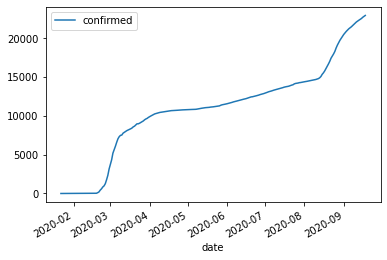

In [505]:
m_filtered = m[m['Country/Region']=='Korea, South']
m_filtered.plot(x = 'date', y='confirmed', kind = 'line')

In [506]:
#m['Country/Region'].unique()

## 正規表達法

In [507]:
a = 'my phone number is 0912345678'
'0912345678' in a

True

In [510]:
import re
n = '8'
print(re.match('8',n))

<_sre.SRE_Match object; span=(0, 1), match='8'>


In [511]:
print(re.match('7',n))

None


In [512]:
# [] => match any character within
print(re.match('[0123456789]',n))

<_sre.SRE_Match object; span=(0, 1), match='8'>


In [513]:
# - -> continuous
# [0123456789] => [0-9]
print(re.match('[0-9]',n))

<_sre.SRE_Match object; span=(0, 1), match='8'>


In [514]:
# \d => [0-9]
print(re.match('\d',n))

<_sre.SRE_Match object; span=(0, 1), match='8'>


In [516]:
s = 'w'
print(re.match('[a-zA-Z]',s))

<_sre.SRE_Match object; span=(0, 1), match='w'>


In [518]:
n = '3'
print(re.match('[a-zA-Z0-9]',n))

<_sre.SRE_Match object; span=(0, 1), match='3'>


In [519]:
# \w => [a-zA-Z0-9]
s = 'z'
print(re.match('\w',n))

<_sre.SRE_Match object; span=(0, 1), match='3'>


In [521]:
s = '$'
print(re.match('\w',s))

None


In [522]:
s = '$'
print(re.match('[\w!@#$%^&*]',s))

<_sre.SRE_Match object; span=(0, 1), match='$'>


In [523]:
# . => match any character
print(re.match('.',s))

<_sre.SRE_Match object; span=(0, 1), match='$'>


In [524]:
s = 'apple'
print(re.match('\w',s))

<_sre.SRE_Match object; span=(0, 1), match='a'>


In [525]:
# {n} => match n charaters
print(re.match('\w{5}',s))

<_sre.SRE_Match object; span=(0, 5), match='apple'>


In [526]:
# {m,n} => match at least m characters, at most n charaters
print(re.match('\w{3,8}',s))

<_sre.SRE_Match object; span=(0, 5), match='apple'>


In [529]:
# {m,} => match at least m charaters
s = 'apocalypse'
print(re.match('\w{1,}',s))

<_sre.SRE_Match object; span=(0, 10), match='apocalypse'>


In [530]:
# {1,} => +
print(re.match('\w+',s))

<_sre.SRE_Match object; span=(0, 10), match='apocalypse'>


In [531]:
# {0,} => *
print(re.match('\w*',s))

<_sre.SRE_Match object; span=(0, 10), match='apocalypse'>


In [535]:
phones = ['0912345678','0912-345678','0912-345-678','0912345678102931273192730127301237201']
for p in phones:
  #print(re.match('09\d{8}',p))
  #print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}',p))

  # ? => {0,1}
  #print(re.match('09\d{2}-?\d{3}-?\d{3}',p))

  # ^=> match begin, $=>match end
  print(re.match('^09\d{2}-?\d{3}-?\d{3}$',p))


<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
None


In [537]:
a = '123@456@789'
re.match('.+@',a) # 貪婪比對
re.match('.+?@',a) # 非貪婪比對

<_sre.SRE_Match object; span=(0, 4), match='123@'>

In [538]:
import re
m = re.match("(\w+)@(\w+)", "david@largidata.com")
m

<_sre.SRE_Match object; span=(0, 15), match='david@largidata'>

In [539]:
m.group(1)

'david'

In [540]:
m.group(2)

'largidata'

In [541]:
m.group(0)

'david@largidata'

In [542]:
m.groups()

('david', 'largidata')

In [543]:
# .=> match any character, \. => match period
import re
m = re.match("(\w+)@([\w\.]+)", "david@largidata.com")
m

<_sre.SRE_Match object; span=(0, 19), match='david@largidata.com'>

In [544]:
m.group(1)

'david'

In [545]:
m.group(2)

'largidata.com'

In [546]:
import re
m = re.match("(?P<username>\w+)@(?P<domainname>[\w\.]+)", "david@largidata.com")
m

<_sre.SRE_Match object; span=(0, 19), match='david@largidata.com'>

In [547]:
m.group('username')

'david'

In [548]:
m.group('domainname')

'largidata.com'

In [549]:
m = re.match(r"(\d+)\.(\d+)", "1999.5")
print(m.groups())

('1999', '5')


In [550]:
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "David Chiu")

In [551]:
m.group('first_name')

'David'

In [552]:
m.group('last_name')

'Chiu'

In [553]:
str1 = 'scp file.txt root@10.0.0.1:./'
m=re.match('^scp ([\w\.]+) (\w+)@([\d\.]+):(.+)',str1)
if m:
  print(m.group(1), m.group(2), m.group(3), m.group(4))

file.txt root 10.0.0.1 ./


In [555]:
a = 'my phone number is 0912345678'
re.match('09\d{8}',a)

In [557]:
m = re.match('.+(09\d{8})',a)
m.group(1)

'0912345678'

In [559]:
m =re.search('(09\d{8})',a)
m.group(1)

'0912345678'

In [565]:
import requests, re
res = requests.get('https://www.csbcnet.com.tw/About/museum/contact.htm', verify=False)
m = re.search('(\w+@[a-zA-Z\.]+)',res.text)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [566]:
m.group(1)

'1588@csbcnet.com.tw'

In [568]:
import requests
res = requests.get('https://www.ptt.cc/bbs/NCCU02_SOCI/M.1033110909.A.9BE.html')
re.findall('09\d{8}', res.text)

['0919980602',
 '0911288478',
 '0921643945',
 '0928546485',
 '0919980602',
 '0911288478',
 '0921643945',
 '0928546485',
 '0919980602',
 '0911288478',
 '0921643945',
 '0928546485',
 '0935522768',
 '0912721590',
 '0953059865',
 '0955898026',
 '0919300330',
 '0918931685',
 '0926034938',
 '0912391637',
 '0921880074',
 '0912765890',
 '0911296734',
 '0931230322',
 '0952707922',
 '0916800512',
 '0955898026',
 '0919297363',
 '0922473809',
 '0936427818',
 '0935274163',
 '0926787122',
 '0926266558',
 '0921695069',
 '0919589101',
 '0932103803',
 '0956100703',
 '0923581159',
 '0922120262',
 '0952225430',
 '0916921358',
 '0929094381',
 '0916266606',
 '0921618917',
 '0926374519',
 '0926229392',
 '0937022315',
 '0939713329']

In [570]:
df2 =df[df['layout'].notnull()]

In [571]:
df2.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,building_type,use_type
5,https://rent.591.com.tw/rent-detail-1633388.html,2017-05-12,近捷運，採光佳，有景觀，全新家電裝潢,新北市淡水區民族路,9F/11F,22000,2房1廳1衛1陽臺,24.00,電梯大樓/整層住家,25.136948,121.462779,電梯大樓,整層住家
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,17000,2房1廳2衛2陽臺,32.00,電梯大樓/整層住家,25.130052,121.720788,電梯大樓,整層住家
13,https://rent.591.com.tw/rent-detail-2042141.html,2017-05-14,家樂福夜市附近，雅房出租2房2廳,嘉義市西區興業西路,7F/8F,7500,2房2廳1衛1陽臺,24.00,電梯大樓/整層住家,23.468374,120.434201,電梯大樓,整層住家
15,https://rent.591.com.tw/rent-detail-2037235.html,2017-05-14,台北市北投新民路捷運溫泉78坪雙拼美廈,台北市北投區新民路,2F/9F,25000,4房3廳3衛3陽臺,78.00,電梯大樓/整層住家,25.140992,121.508139,電梯大樓,整層住家
16,https://rent.591.com.tw/rent-detail-2226232.html,2017-05-13,出海口海景高樓層溫馨房,新北市淡水區中正東路一段,19F/21F,15000,1房1廳1衛0陽臺,18.01,電梯大樓/整層住家,25.159416,121.456672,電梯大樓,整層住家


In [573]:
df2[['bedroom', 'living_room', 'bathroom', 'balcony']] = df2['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛(\d+)陽臺')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [574]:
df2.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,building_type,use_type,bedroom,living_room,bathroom,balcony
5,https://rent.591.com.tw/rent-detail-1633388.html,2017-05-12,近捷運，採光佳，有景觀，全新家電裝潢,新北市淡水區民族路,9F/11F,22000,2房1廳1衛1陽臺,24.00,電梯大樓/整層住家,25.136948,121.462779,電梯大樓,整層住家,2,1,1,1
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,17000,2房1廳2衛2陽臺,32.00,電梯大樓/整層住家,25.130052,121.720788,電梯大樓,整層住家,2,1,2,2
13,https://rent.591.com.tw/rent-detail-2042141.html,2017-05-14,家樂福夜市附近，雅房出租2房2廳,嘉義市西區興業西路,7F/8F,7500,2房2廳1衛1陽臺,24.00,電梯大樓/整層住家,23.468374,120.434201,電梯大樓,整層住家,2,2,1,1
15,https://rent.591.com.tw/rent-detail-2037235.html,2017-05-14,台北市北投新民路捷運溫泉78坪雙拼美廈,台北市北投區新民路,2F/9F,25000,4房3廳3衛3陽臺,78.00,電梯大樓/整層住家,25.140992,121.508139,電梯大樓,整層住家,4,3,3,3
16,https://rent.591.com.tw/rent-detail-2226232.html,2017-05-13,出海口海景高樓層溫馨房,新北市淡水區中正東路一段,19F/21F,15000,1房1廳1衛0陽臺,18.01,電梯大樓/整層住家,25.159416,121.456672,電梯大樓,整層住家,1,1,1,0


In [579]:
df2.loc[70295, 'address']

'雲林縣斗六市江厝路'

In [580]:
df2['address'].str.extract('(.+[市縣])(.+[區市])(.+[路街])')

,0,1,2
5,新北市,淡水區,民族路
9,基隆市,安樂區,樂利三街
13,嘉義市,西區,興業西路
15,台北市,北投區,新民路
16,新北市,淡水區,中正東路
...,...,...,...
70295,雲林縣,斗六市,江厝路
70296,桃園市,中壢區,新生路
70302,台北市,北投區,天母西路
70304,新北市,汐止區,汐萬路


### 小作業
- 現有一資料集 Churn_Modelling.csv (https://github.com/ywchiu/esunpy/blob/master/data/Churn_Modelling.csv) ，描述客戶的基本資料與客戶是否流失(Churn) 等基本資訊，請讀入該資料集後，計算各性別(Gender)的平均預估薪資(EstimatedSalary)？

**附註**
- ! wget https://raw.githubusercontent.com/ywchiu/esunpy/master/data/Churn_Modelling.csv

In [581]:
! wget https://raw.githubusercontent.com/ywchiu/esunpy/master/data/Churn_Modelling.csv

--2020-09-19 09:24:48--  https://raw.githubusercontent.com/ywchiu/esunpy/master/data/Churn_Modelling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674857 (659K) [text/plain]
Saving to: ‘Churn_Modelling.csv’

Churn_Modelling.csv 100%[===================>] 659.04K  --.-KB/s    in 0.03s   

2020-09-19 09:24:49 (19.2 MB/s) - ‘Churn_Modelling.csv’ saved [674857/674857]

